In [34]:
#22 : Build triangulations of the letters of the alphabet, and compute their Euler characteristic.

def caracteristica_euler(vertice, aresta, face):
    return len(vertice) - len(aresta) + len(face)

# Triangulação simplificada das letras A,B,C do alfabeto
triangulacao = {
    "A": {"vertice": ["A1", "A2", "A3", "A4", "A5"],
           "aresta": [("A1", "A2"), ("A2", "A3"), ("A3", "A4"), ("A4", "A5"), ("A1", "A5"), ("A2", "A4")],
           "face": [("A1", "A2", "A4"), ("A1", "A4", "A5")]},
    "B": {"vertice": ["B1", "B2", "B3", "B4", "B5", "B6"],
           "aresta": [("B1", "B2"), ("B2", "B3"), ("B3", "B4"), ("B4", "B5"), ("B5", "B6"), ("B1", "B6"), ("B2", "B4"), ("B4", "B6")],
           "face": [("B1", "B2", "B4"), ("B1", "B4", "B6"), ("B2", "B3", "B4"), ("B4", "B5", "B6")]},
    "C": {"vertice": ["C1", "C2", "C3", "C4"],
           "aresta": [("C1", "C2"), ("C2", "C3"), ("C3", "C4"), ("C4", "C1")],
           "face": []},
}

for letra, triangulacao in triangulacao.items():
    chi = caracteristica_euler(triangulacao['vertice'], triangulacao['aresta'], triangulacao['face'])
    print(f"Característica de Euler para {letra}: {chi}")

Característica de Euler para A: 1
Característica de Euler para B: 2
Característica de Euler para C: 0


In [30]:
#23 :  For every n, triangulate the bouquet of n circles (see below). Compute their Euler characteristic.

def circulos_buque(n):
    vertice = ["centro"] 
    aresta = [("centro", "centro") for _ in range(n)] 
    face = []  
    return caracteristica_euler(vertice, aresta, face)

print("Característica de Euler para buquê de 9 círculos:", circulos_buque(3))

Característica de Euler para buquê de 9 círculos: -2


In [64]:
#24 : Implement the following triangulation of the torus: Compute its Euler characteristic.

# Função para criar a triangulação correta do toro
def triangulo_torus():
    # Vértices (modelo simplificado de toro 3x3)
    vertices = [f"v{i}" for i in range(9)]
    
    # Arestas horizontais e verticais (sem duplicação)
    arestas = [
        ("v0", "v1"), ("v1", "v2"), ("v2", "v0"),  # topo
        ("v3", "v4"), ("v4", "v5"), ("v5", "v3"),  # meio
        ("v6", "v7"), ("v7", "v8"), ("v8", "v6"),  # base
        
        ("v0", "v3"), ("v1", "v4"), ("v2", "v5"),  # verticais esq/meio/dir
        ("v3", "v6"), ("v4", "v7"), ("v5", "v8")   # base
    ]
    
    # Faces (triângulos corretamente definidos)
    faces = [
        ("v0", "v1", "v4"), ("v0", "v4", "v3"),
        ("v1", "v2", "v5"), ("v1", "v5", "v4"),
        ("v3", "v4", "v7"), ("v3", "v7", "v6"),
    ]

    return caracteristica_euler(vertices, arestas, faces)

# Resultado esperado: 0
print("Característica de Euler para o toro:", triangulo_torus())

Característica de Euler para o toro: 0


In [55]:
#25 : Compute the number of connected components of G(r) for several values of r.

import math
import networkx as nx

# Lista de pontos fornecida
pontos = {
    0: [0.29409772548731694, 0.6646626625013836],
    1: [0.01625840776679577, 0.1676405753593595],
    2: [0.15988905150272759, 0.6411323760808338],
    3: [0.9073191075894482, -0.16417982219713312],
    4: [-0.18661467838673884, 0.31618948583046413],
    5: [-0.3664040542098381, 0.9098590694955988],
    6: [-0.43753448716144905, -0.8820102274699417],
    7: [0.4096730199915961, -0.23801426675264126],
    8: [0.5903822103474676, -0.7285102954232894],
    9: [0.9133851839417766, -0.6606557328320093],
    10: [-0.15516122940597588, 0.7565411235103017],
    11: [-0.38626186295039866, -0.3662321656058476],
    12: [0.005209710070218199, 0.27655964872153116],
    13: [0.670078068894711, -0.00932202688834849],
    14: [-0.011268465716772091, 0.24340880308017376],
    15: [-0.6441978411451603, -0.9672635759413206],
    16: [-0.2841794022401025, -0.6734801188906114],
    17: [-0.15473260248990717, -0.1365357396855129],
    18: [0.7177096105982121, 0.9378197891592468],
    19: [-0.4677068504994166, 0.1533930130294956],
    20: [-0.32379909116817096, 0.9694800649768063],
    21: [-0.2886940472879451, -0.039544695812395725],
    22: [-0.5900701743351606, 0.8350804500575086],
    23: [0.14931959728335853, 0.869106793774487],
    24: [-0.14500672678238824, -0.3170082291070364],
    25: [0.07324547392476122, 0.6653572287065117],
    26: [-0.662990048258566, 0.1908198608241125],
    27: [-0.25641262456436276, -0.9844196180941553],
    28: [-0.5105685407819842, -0.4236604017060557],
    29: [0.6792549581008038, -0.026215820387260003]
}

def distancia(ponto1, ponto2):
    """Calcula a distância euclidiana entre dois pontos."""
    return math.sqrt((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)

def complexo_gr(pontos, r):
    """Cria um grafo de proximidade G(r) e retorna o número de componentes conexas."""
    G = nx.Graph()

    # Adicionar nós
    for i in pontos:
        G.add_node(i)

    # Adicionar arestas se a distância for menor ou igual a r
    for i in pontos:
        for j in pontos:
            if i != j and distancia(pontos[i], pontos[j]) <= r:
                G.add_edge(i, j)

    # Número de componentes conexas
    return nx.number_connected_components(G)

# Testando para diferentes valores de r
for r in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
    print(f"Componentes conexas para r = {r}:", complexo_gr(pontos, r))

Componentes conexas para r = 0.05: 28
Componentes conexas para r = 0.1: 25
Componentes conexas para r = 0.15: 23
Componentes conexas para r = 0.2: 19
Componentes conexas para r = 0.3: 9
Componentes conexas para r = 0.5: 3


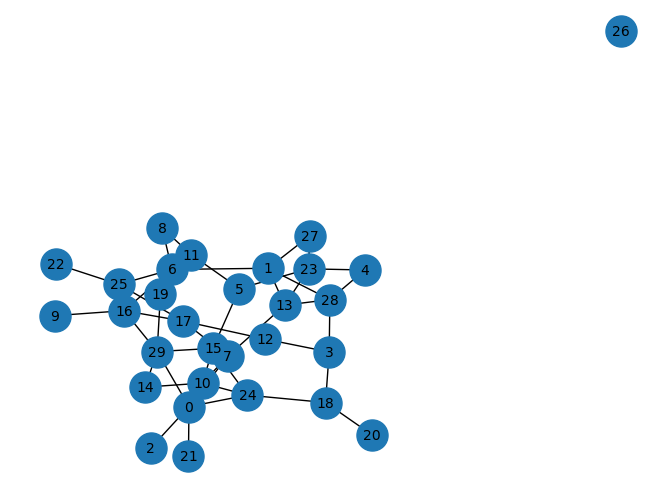

Componentes conexas para G(30, 0.1): 2


In [57]:
#26 : A ErdosRenyi random graph G(np)

import networkx as nx
import matplotlib.pyplot as plt

def erdos_renyi(n, p):
    G = nx.erdos_renyi_graph(n, p)
    nx.draw(G, with_labels=True, node_size=500, font_size=10)
    plt.show()
    return nx.number_connected_components(G)

print("Componentes conexas para G(30, 0.1):", erdos_renyi(30, 0.1))